# Titanic Dataset
Data Analysis on Titanic Data (Python)
***

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

# Introduction

# Data Dictionary

* **'Survival':** 	 0 = No, 1 = Yes
* **'Pclass':** 	 Ticket class 	 1 = 1st, 2 = 2nd, 3 = 3rd
* **'Sex':** 	 Sex
* **'Age':**	 Age in years
* **'SibSp':** 	 # of siblings / spouses aboard the Titanic
* **'Parch':** 	 # of parents / children aboard the Titanic
* **'Ticket':** 	 Ticket number
* **'Fare':** 	 Passenger fare
* **'Cabin':** 	 Cabin number
* **'Embarked':** 	 Port of Embarkation 	 C = Cherbourg, Q = Queenstown, S = Southampton

# Import Lybraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy import stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load and View Data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#Show all column names
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
#Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
# Counting rows and coulums
col_row = df.shape
print('Columns in dataset:', col_row[1],'\nRows in dataset:', col_row[0])

Columns in dataset: 12 
Rows in dataset: 1309


In [9]:
# Total cells in the dataset
total_cells=np.product(df.shape)
print('Total cells in this dataset:',total_cells)

Total cells in this dataset: 15708


# Data Cleaning

## Identifying duplicate values

In [10]:
df.duplicated().sum()

0

In [11]:
df.loc[train_data.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Identifying missing values

In [12]:
# Find the amount of missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Cabin          1014
Age             263
Embarked          2
Fare              1
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

In [13]:
# Calculating the percentage of missing values:

# 1. Set variables for total amount of cells and total amount of missing data
total_missing = missing_values.sum()

# 2. Calculating percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print("Total missing values: {}  =  {:.2f} %".format(total_missing, percent_missing))

Total missing values: 1280  =  8.15 %


In [14]:
number_missing = df.isnull().sum().sort_values(ascending=False)
pct_column = (df.isnull().sum() / len(df) * 100).round(2).astype('str')+' %'
pct_total = (df.isnull().sum()/df.isna().sum().sum()*100).round(2).astype('str')+' %'
missing_values = pd.concat([number_missing, pct_column, pct_total], axis=1, keys=['Number_Missing_Values', 'PCT_Missing_in_Column','PCT_of_all_Missing'])
   
print('\nMISSING VALUES IN',df.shape[0],'ROWS:')    
all_missing = missing_values.loc[missing_values['Number_Missing_Values'] > 0]
all_missing


MISSING VALUES IN 1309 ROWS:


,Number_Missing_Values,PCT_Missing_in_Column,PCT_of_all_Missing
Cabin,1014,77.46 %,79.22 %
Age,263,20.09 %,20.55 %
Embarked,2,0.15 %,0.16 %
Fare,1,0.08 %,0.08 %


## Visualisation of missing data

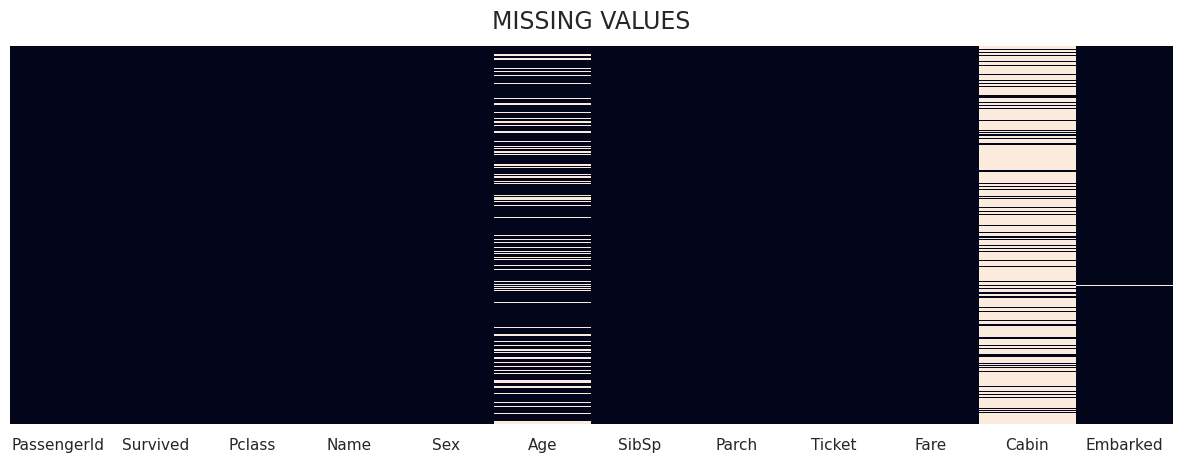

In [15]:
# Detect missing values
missing = df.isnull()

# Visualisation
plt.figure(figsize=(15,5), dpi=100)
sns.heatmap(missing,yticklabels=False, cbar=False, cmap=None)
plt.title('MISSING VALUES', size=17, pad=13)
plt.show()

## Dealing with missing values

**Drop data**
*     Drop the whole row
*     Drop the whole column

*or*

**Replace data**
*     Replace it by mean / median
*     Replace it by frequency
*     Replace it based on other functions

Choosing a method based on the composition and correlation of the data and the task or goal settings.

#### Looking at the columns with missing data

***
`Embarked`
***

In [16]:
# Only two values are missing in the 'Embarked' column. Let's check the corresponding rows.
df[pd.isnull(df.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
# Checking and counting the values in the 'Embarked' column.
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
# As only two values are missing (0.22%), I decided to replace them by the most listed value.
df["Embarked"] = df["Embarked"].fillna("S")

In [19]:
# ... and if the values have benn replaced by 'S'
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

***
`Cabin`
***

As **most of the data in the column "Cabin" is missing** (687 out of 891 values --> **77%**), and I do not need the column for my analysis I deciced to **delete the column** - deleting the rows would remove 687 useful rows.

In [20]:
# Deleting the column
df.drop("Cabin", axis=1, inplace=True)

In [21]:
# Checking if the columns "Embarked" and "Cabin" are deleted
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***
`Age`
***

Looking for the best way to fill the missing data

In [22]:
df.Age.describe().to_frame()

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


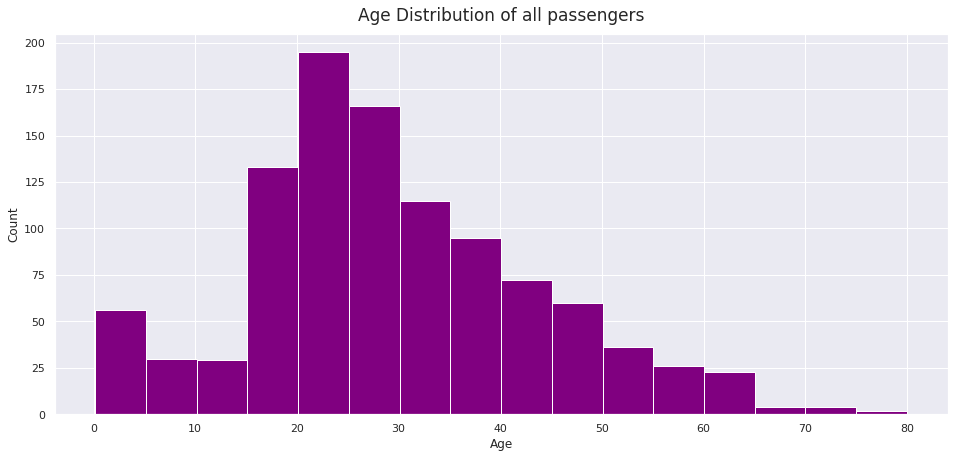

In [23]:
# The histogramm shows the age distribution of all passengers
df['Age'].hist(bins=16, color='purple' ,figsize=(16,7))
plt.title('Age Distribution of all passengers', size=17, pad=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

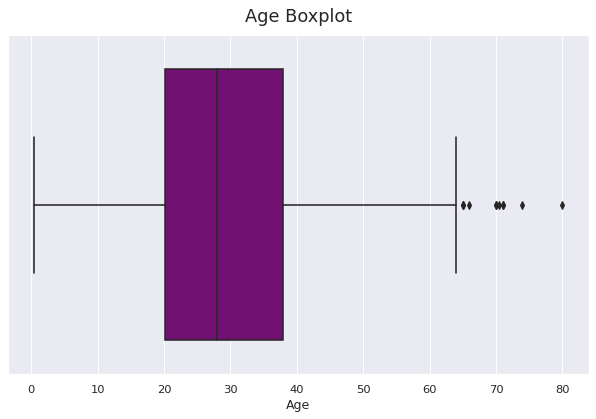

In [24]:
plt.figure(figsize=(10,6), dpi=75)
sns.boxplot(x="Age", data=train_data, color='purple')
plt.title('Age Boxplot', size=17, pad=13)
plt.show()

In [25]:
# Mean age vs. median
display(df.Age.mean())
display(df.Age.median())

29.881137667304014

28.0

The **average age** of all people on board is **29.7**. The **middle value** is **28**.
Replacing the missing values with the mean or the median would be inacurate. I would like to find out the average age of men and women in each class and check if there is a difference and if there might be further correlations.

In [26]:
# Grouping Column 'Sex' to see the average age or women and men
grouped_sex_age = df.groupby(['Sex']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_age

,len,min,max,mean,median
Sex,,,,,
female,466.0,0.17,76.0,28.687088,27.0
male,843.0,0.33,80.0,30.585228,28.0


In [27]:
# Grouping the 'Pclass' to see if the average age changes from class to class
grouped_class_age = df.groupby(['Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_class_age

,len,min,max,mean,median
Pclass,,,,,
1,323.0,0.92,80.0,39.159930,39.0
2,277.0,0.67,70.0,29.506705,29.0
3,709.0,0.17,74.0,24.816367,24.0


**As the average age seem to depend on both, sex and class.**

In [28]:
# Checking the (aveage) age and amount of people for each class and sex
grouped_sex_pclass_age = train_data.groupby(['Sex', 'Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len   min   max       mean  median
Sex    Pclass                                      
female 1        94.0  2.00  63.0  34.611765    35.0
       2        76.0  2.00  57.0  28.722973    28.0
       3       144.0  0.75  63.0  21.750000    21.5
male   1       122.0  0.92  80.0  41.281386    40.0
       2       108.0  0.67  70.0  30.740707    30.0
       3       347.0  0.42  74.0  26.507589    25.0

**The average age in each class and sex is very different. There also seems to be a correlation between Age and SibSp. 
In my opinion this needs to be considered when replacing the missing values**.

In [29]:
# Checking the age and amount of people for each class and sex and SibSp
grouped_sex_pclass_age = df.groupby(['Pclass', 'SibSp']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len    min   max       mean  median
Pclass SibSp                                       
1      0      198.0   4.00  80.0  39.033333    38.0
       1      113.0   0.92  76.0  39.943178    39.0
       2        8.0  13.00  59.0  39.125000    47.0
       3        4.0  19.00  28.0  23.500000    23.5
2      0      182.0   0.83  70.0  31.104398    29.0
       1       82.0   0.67  63.0  27.767317    29.0
       2       12.0   1.00  32.0  19.250000    22.5
       3        1.0  30.00  30.0  30.000000    30.0
3      0      511.0   0.33  74.0  27.055311    25.0
       1      124.0   0.17  50.0  23.576044    24.0
       2       22.0   0.75  41.0  19.031250    19.5
       3       15.0   2.00  33.0  12.454545     8.0
       4       22.0   1.00  38.0   8.772727     7.0
       5        6.0   1.00  16.0  10.166667    10.5
       8        9.0  14.50  14.5  14.500000    14.5

In [30]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

In [31]:
# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [32]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

In [33]:
# Checking the new column and values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


In [34]:
# Finally checking if there is any missing data in the new column 'Age_Filled_Na'
df.Age_Filled.isnull().sum()

0

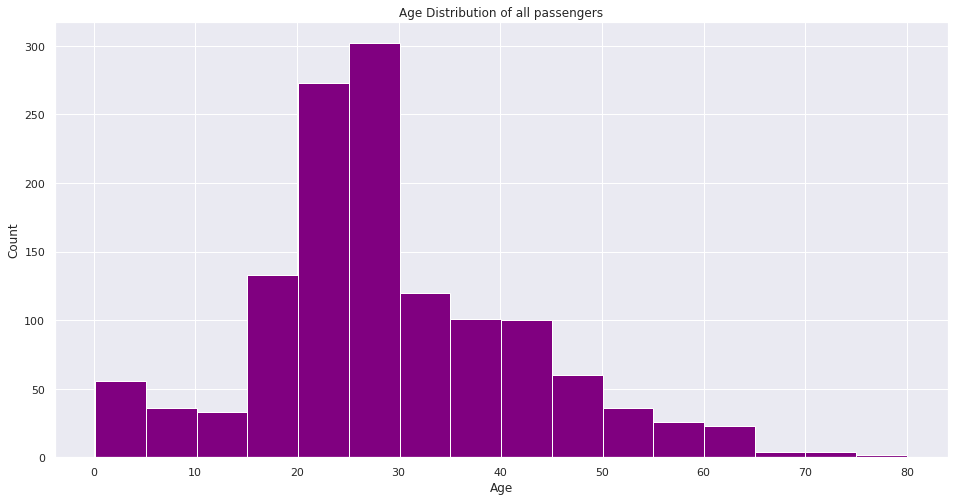

In [35]:
# The histogramm shows the age distribution of all passengers after replacing the missing values
df['Age_Filled'].hist(bins=16, color='purple' ,figsize=(16,8))
plt.title('Age Distribution of all passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

***
`Fare`
***

In [36]:
# Drop whole row with NaN in "price" column
df.dropna(subset=["Fare"],axis=0 , inplace=True)

# Reset index, because two rows were dropped
df.reset_index(drop=True, inplace=True)

df[pd.isnull(df['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled


# Analysing Patterns using Visualisations

In [37]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled
count,1308.000000,1308.000000,1308.000000,1308,1308,1045.000000,1308.000000,1308.000000,1308,1308.000000,1308,1308.000000
unique,NaN,NaN,NaN,1306,2,NaN,NaN,NaN,928,NaN,3,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,S,NaN
freq,NaN,NaN,NaN,2,842,NaN,NaN,NaN,11,NaN,915,NaN
mean,654.702599,0.377676,2.294343,NaN,NaN,29.851837,0.499235,0.385321,NaN,33.295479,NaN,29.256246
std,378.011421,0.484991,0.837929,NaN,NaN,14.389194,1.041965,0.865826,NaN,51.758668,NaN,13.228828
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,0.170000
25%,327.750000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,22.000000
50%,654.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,26.000000
75%,981.250000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,36.000000


In [38]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1308 non-null   int64  
 1   Survived     1308 non-null   int64  
 2   Pclass       1308 non-null   int64  
 3   Name         1308 non-null   object 
 4   Sex          1308 non-null   object 
 5   Age          1045 non-null   float64
 6   SibSp        1308 non-null   int64  
 7   Parch        1308 non-null   int64  
 8   Ticket       1308 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1308 non-null   object 
 11  Age_Filled   1308 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


The data type of 'Sex' is an object, which will not be visible in a correlation. I would like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'

In [39]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Filled,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,0


## Correlation

In [40]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Filled,Sex_Number
PassengerId,1.000000,-0.019770,-0.039043,0.026792,-0.054874,0.009297,0.031428,0.022904,-0.012828
Survived,-0.019770,1.000000,-0.264342,-0.052168,0.002086,0.108688,0.233622,-0.040406,0.688233
Pclass,-0.039043,-0.264342,1.000000,-0.411086,0.061162,0.018615,-0.558629,-0.449933,-0.124198
Age,0.026792,-0.052168,-0.411086,1.000000,-0.243139,-0.150241,0.178740,1.000000,-0.062235
SibSp,-0.054874,0.002086,0.061162,-0.243139,1.000000,0.373485,0.160238,-0.223171,0.109369
Parch,0.009297,0.108688,0.018615,-0.150241,0.373485,1.000000,0.221539,-0.138930,0.212934
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,0.196841,0.185523
Age_Filled,0.022904,-0.040406,-0.449933,1.000000,-0.223171,-0.138930,0.196841,1.000000,-0.070059
Sex_Number,-0.012828,0.688233,-0.124198,-0.062235,0.109369,0.212934,0.185523,-0.070059,1.000000


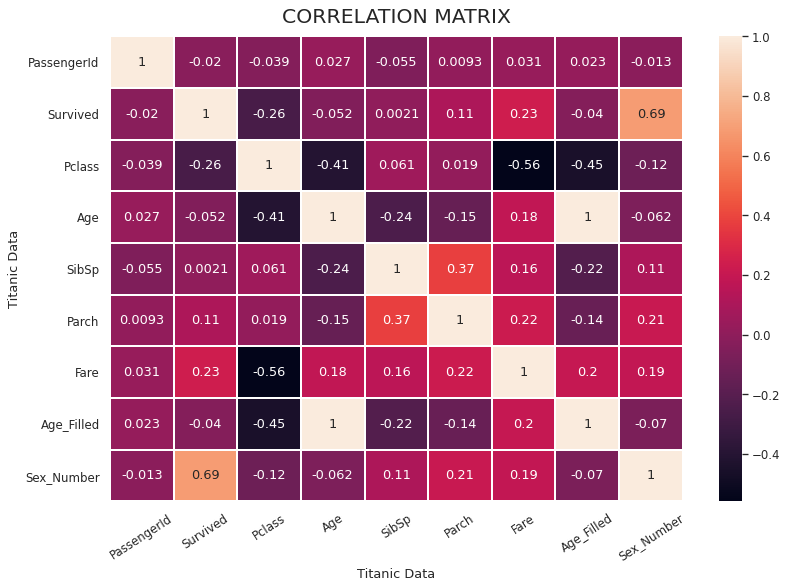

In [41]:
# Visualisation of the corralation table
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

**This matrix shows that there is a correlation between sex and the chance to survive.** There is also a correlation between fare and the chance to survive, as well as a **negative correlation between the class and the chance to survive**.

## P-values

In [42]:
# Correlation and P-value of 'Survived' and 'Sex'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Sex_Number'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6882333343185678  with a P-value of P = 3.0900468079357625e-184


In [43]:
# Correlation and P-value of 'Survived' and 'Fare'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2336224254447521  with a P-value of P = 1.1296702766602682e-17


In [44]:
# Correlation and P-value of 'Survived' and 'Pclass'
pearson_coef, p_value = stats.pearsonr(df['Survived'], df['Pclass'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.2643420123493154  with a P-value of P = 2.367929150775841e-22


## Continuous Numerical Variables

### Linear Relationship

***
`Age` and `Fare`
***

In [45]:
df[["Age_Filled","Fare"]].corr()

,Age_Filled,Fare
Age_Filled,1.000000,0.196841
Fare,0.196841,1.000000


In [46]:
# Calculating the P-vau
pearson_coef, p_value = stats.pearsonr(df['Age_Filled'], df['Fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.19684145408710152  with a P-value of P = 6.839795331514233e-13


(0.1, 83.9915)

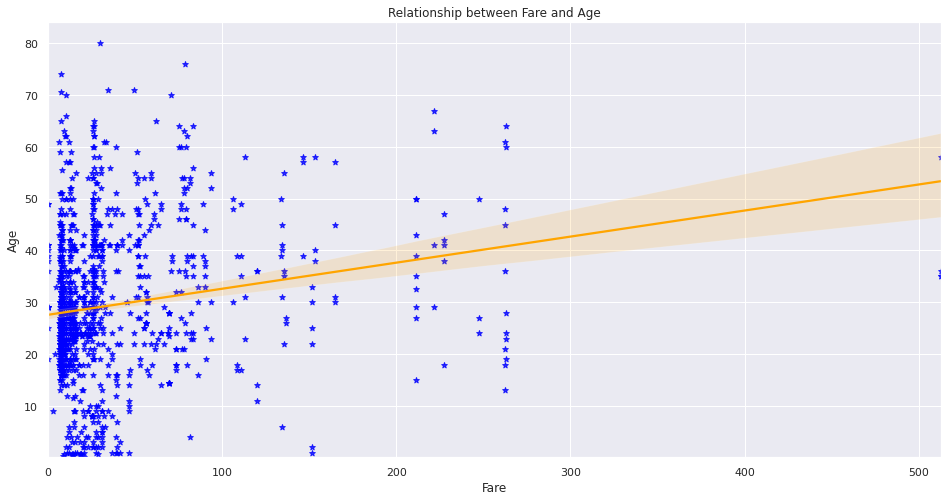

In [47]:
plt.figure(figsize=(16,8))
sns.regplot(x="Fare", y="Age_Filled",data=df, scatter_kws={'color':'blue'}, line_kws={'color':'orange'}, marker='*')
plt.title('Relationship between Fare and Age')
plt.ylabel('Age')
plt.ylim(0.1,)

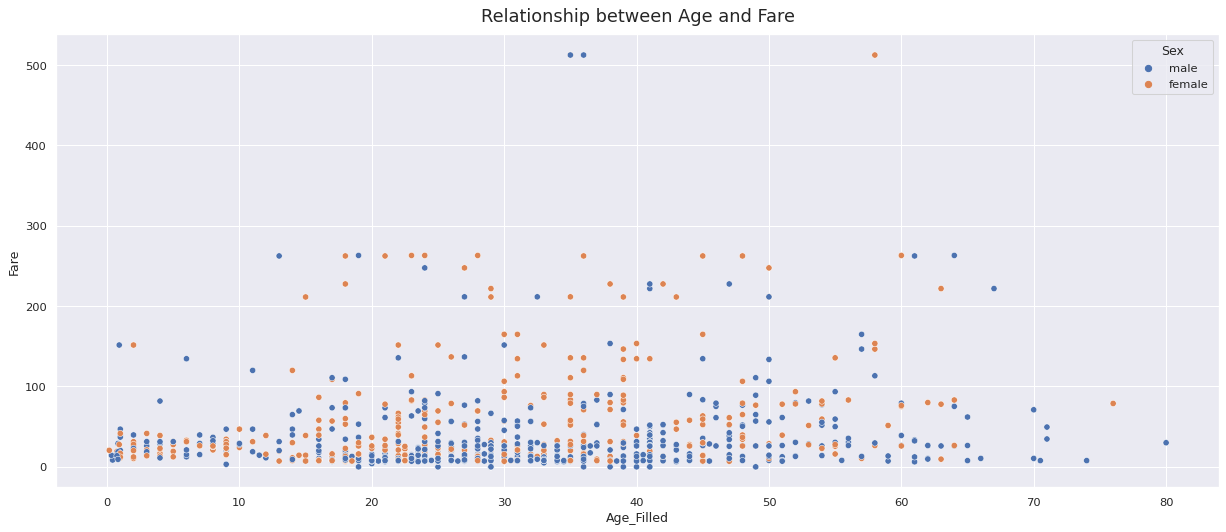

In [48]:
plt.figure(figsize=(20,8), dpi=75)
sns.scatterplot(x='Age_Filled', y='Fare', hue='Sex', data = df)
plt.title('Relationship between Age and Fare', size=17, pad=13)
plt.show()

## Categorical Variables

***
`Sex`
***

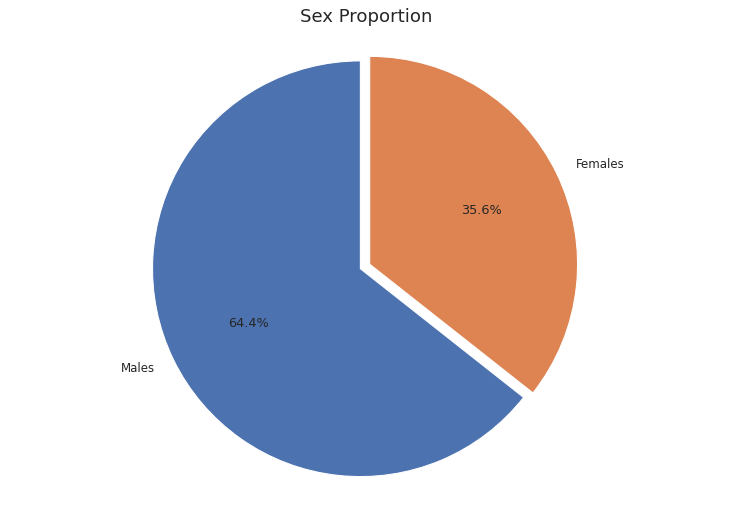

In [49]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

***
`Survived`
***

In [50]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,814
1,494


In [51]:
pd.pivot_table(df, index="Survived", values=['Pclass','Age_Filled','SibSp', 'Parch', 'Fare'])


,Age_Filled,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,29.672494,23.879124,0.312039,2.466830,0.497543
1,28.570364,48.811497,0.506073,2.010121,0.502024


***
`Survived` and `Age`
***

In [52]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,814.0,0.33,74.0,30.463232,28.0
1,494.0,0.17,80.0,28.931079,28.0


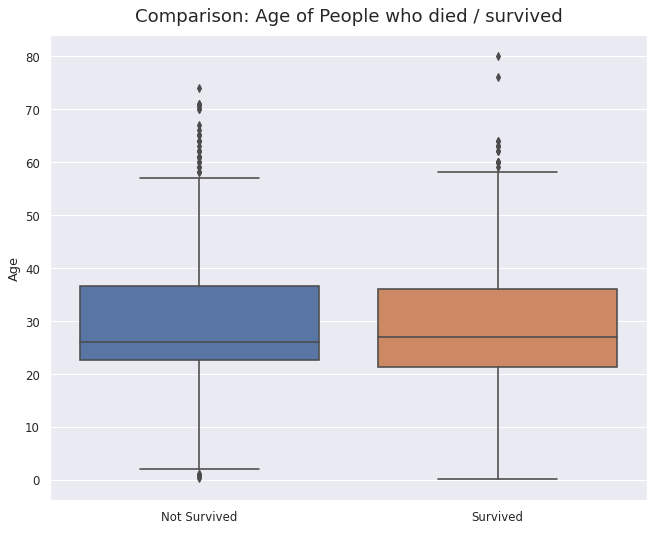

In [53]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

***
`Survived` and `Sex`
***

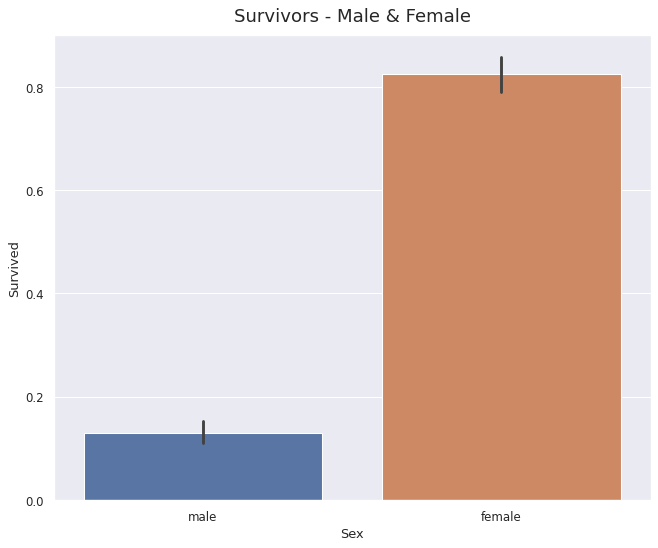

In [54]:
# The barplot compares the survival of men to women
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

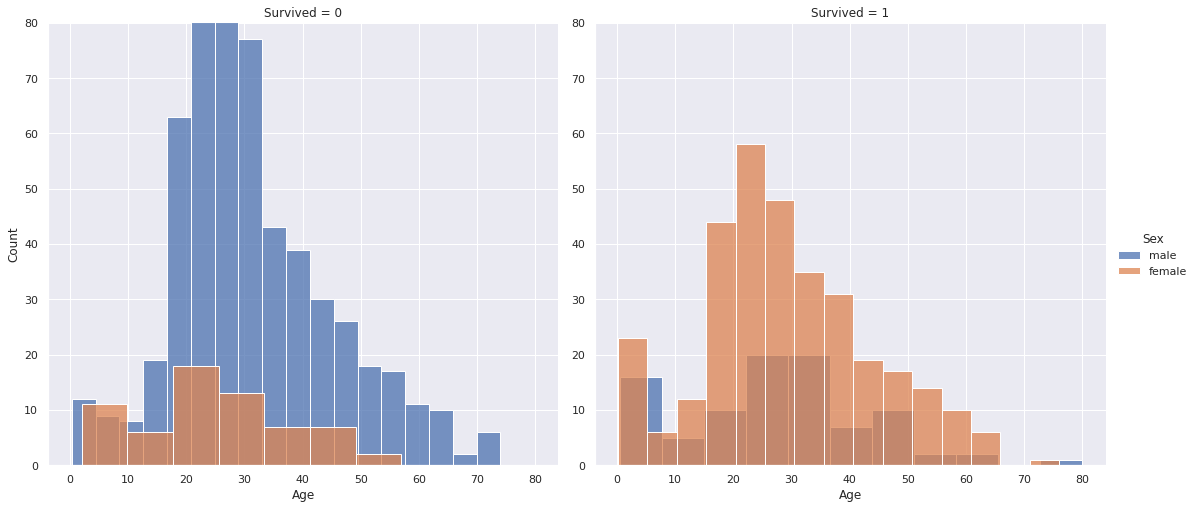

In [55]:
# Sex and Age compared with Survived and Not Survived
g = sns.FacetGrid(df, col='Survived', sharey=False, ylim=(0,80), hue='Sex', height=7, aspect=1.1)
g.map_dataframe(sns.histplot, x='Age')
g.set_axis_labels('Age', 'Count')
g.add_legend()
plt.show()

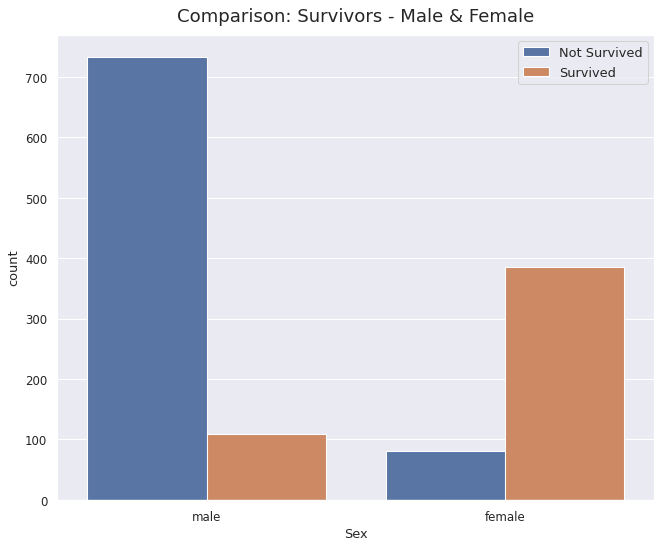

In [56]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [57]:
# Amount and average age of women and man who survived compared to those who died.
df.groupby(['Sex','Survived']).Age.agg([len,'mean', 'median'])

len       mean  median
Sex    Survived                          
female 0          81.0  25.046875   24.50
       1         385.0  29.406142   28.00
male   0         733.0  31.077855   28.25
       1         109.0  27.276022   28.00

In [58]:
# Percentage of women who survived
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived: {:.2f}".format(rate_women))

% of women who survived: 82.62


In [59]:
# Percentage of men who survived
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100

print("% of men who survived: {:.2f}".format(rate_men))

% of men who survived: 12.95


***
`Survived` and `Pclass`
***

In [60]:
df['Pclass'].value_counts()

3    708
1    323
2    277
Name: Pclass, dtype: int64

In [61]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived       
1      0         137.0
       1         186.0
2      0         160.0
       1         117.0
3      0         517.0
       1         191.0

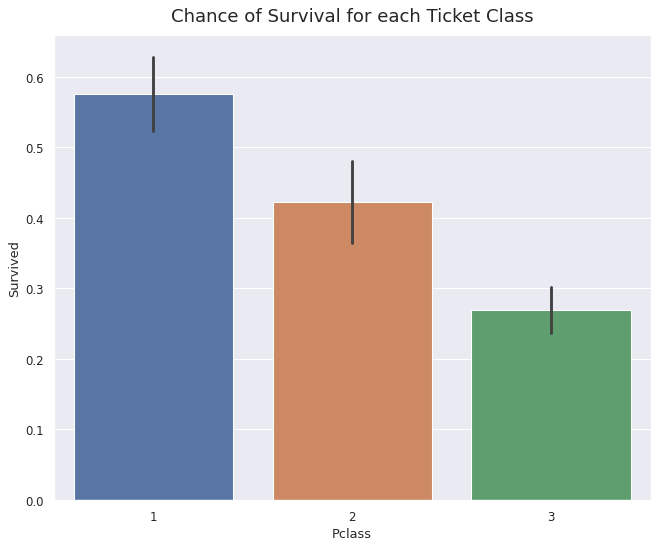

In [62]:
# Compares the chance of survival for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

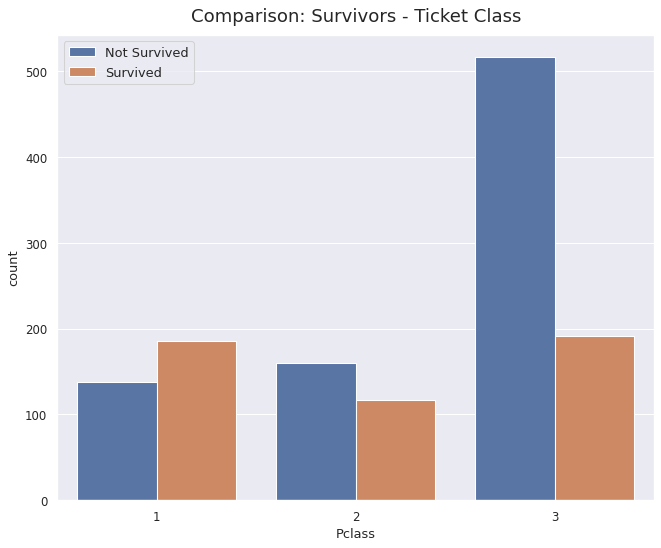

In [63]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

***
`Survived`, `Pclass`, `Sex` and `Age`
***

In [64]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                               
female 0        1         3.0   2.00  50.0  25.666667
                2         6.0  24.00  57.0  36.000000
                3        72.0   2.00  48.0  23.818182
       1        1       141.0  14.00  76.0  37.300000
                2       100.0   0.92  60.0  26.973402
                3       144.0   0.17  63.0  21.259485
male   0        1       134.0   6.00  71.0  42.752252
                2       154.0   2.00  70.0  32.367133
                3       445.0   0.33  74.0  26.302935
       1        1        45.0   0.92  80.0  36.248000
                2        17.0   0.67  62.0  16.022000
                3        47.0   0.42  45.0  22.274211

***
`Survived` and `Parch`
***

In [65]:
df['Parch'].value_counts().to_frame()

,Parch
0,1001
1,170
2,113
3,8
4,6
5,6
6,2
9,2


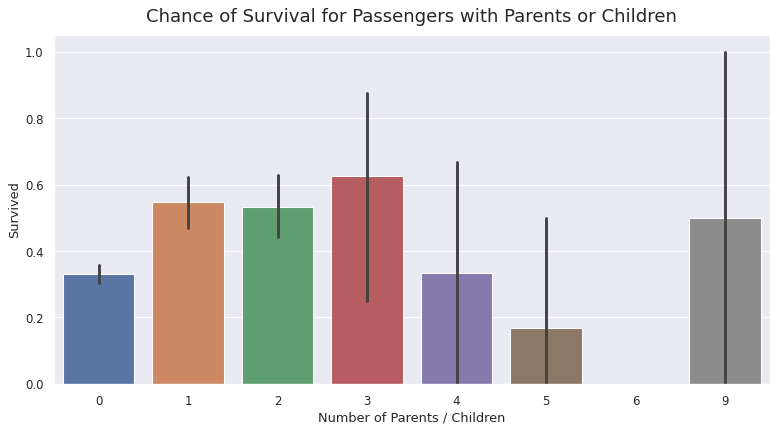

In [66]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

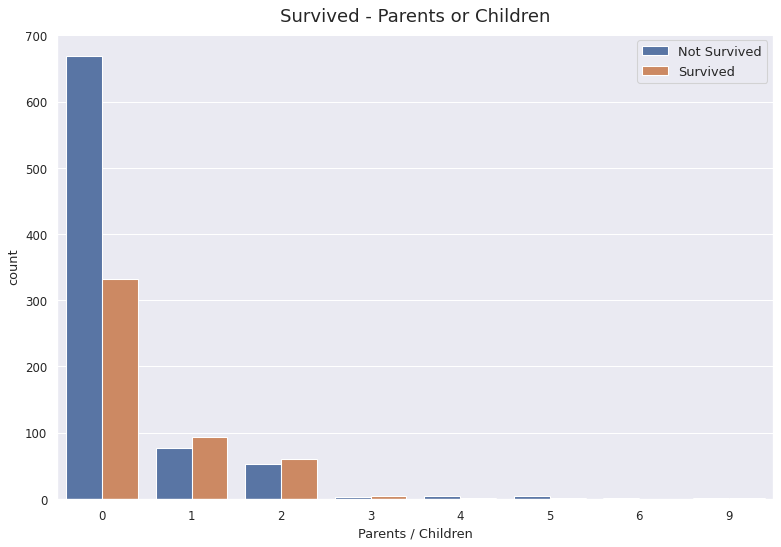

In [67]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [68]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                    
0     0         669.0  11.00  74.0
      1         332.0   5.00  80.0
1     0          77.0   0.75  70.0
      1          93.0   0.42  64.0
2     0          53.0   0.33  58.0
      1          60.0   0.17  64.0
3     0           3.0  16.00  61.0
      1           5.0  24.00  54.0
4     0           4.0  29.00  64.0
      1           2.0  60.00  60.0
5     0           5.0  39.00  41.0
      1           1.0  38.00  38.0
6     0           2.0  40.00  43.0
9     0           1.0    NaN   NaN
      1           1.0    NaN   NaN

***
`Survived` and `SibSp`
***

In [69]:
df.SibSp.value_counts()


0    890
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [70]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                  
0     0         592.0  31.537864
      1         298.0  29.689549
1     0         153.0  33.509398
      1         166.0  28.840204
2     0          23.0  23.950000
      1          19.0  23.093750
3     0          15.0  11.181818
      1           5.0  27.600000
4     0          18.0   7.222222
      1           4.0  15.750000
5     0           5.0  10.200000
      1           1.0  10.000000
8     0           8.0  14.500000
      1           1.0        NaN

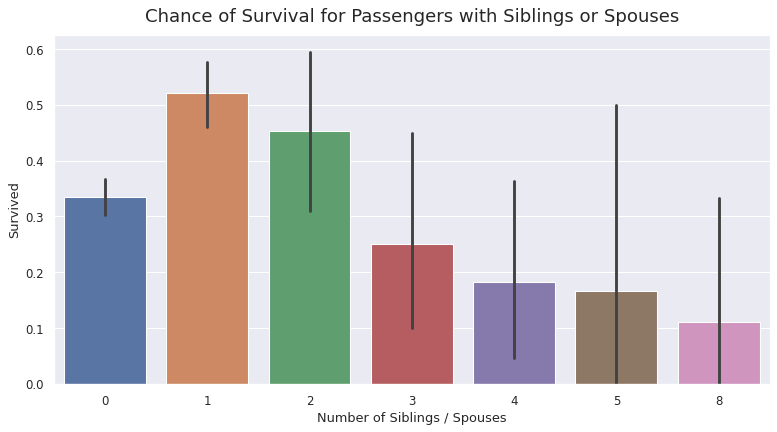

In [71]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

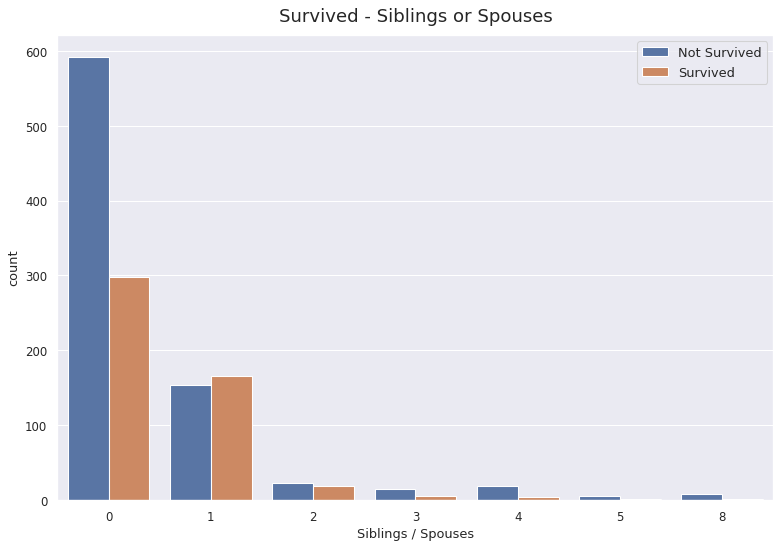

In [72]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [73]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                               
0     0         592.0   0.33  74.0  31.537864
      1         298.0   0.42  80.0  29.689549
1     0         153.0   0.75  70.0  33.509398
      1         166.0   0.17  76.0  28.840204
2     0          23.0   9.00  44.0  23.950000
      1          19.0   0.75  59.0  23.093750
3     0          15.0   2.00  31.0  11.181818
      1           5.0  23.00  33.0  27.600000
4     0          18.0   1.00  16.0   7.222222
      1           4.0   3.00  38.0  15.750000
5     0           5.0   1.00  16.0  10.200000
      1           1.0  10.00  10.0  10.000000
8     0           8.0  14.50  14.5  14.500000
      1           1.0    NaN   NaN        NaN

***
`Survived` and `Embarked`
***

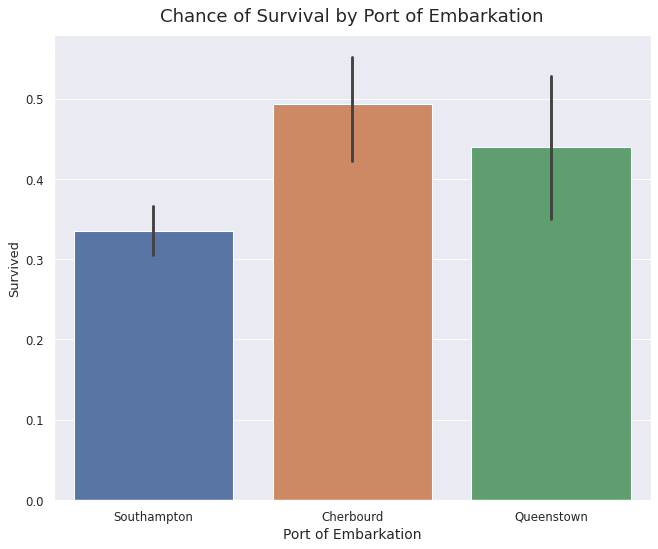

In [74]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

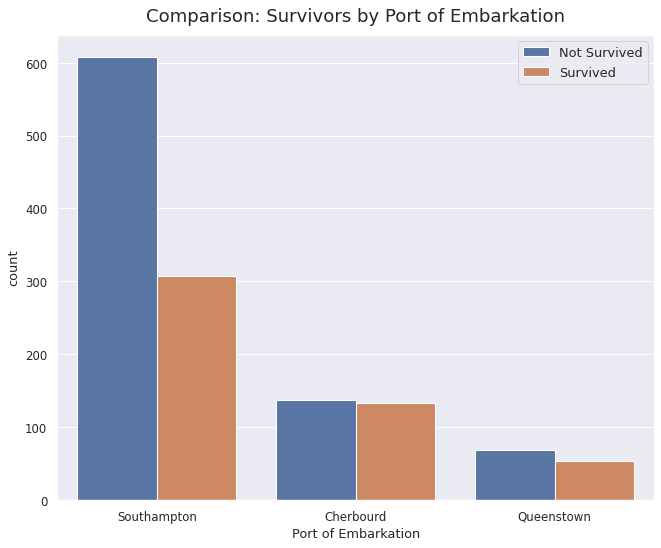

In [75]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

***
`Age` and `SibSp`
***

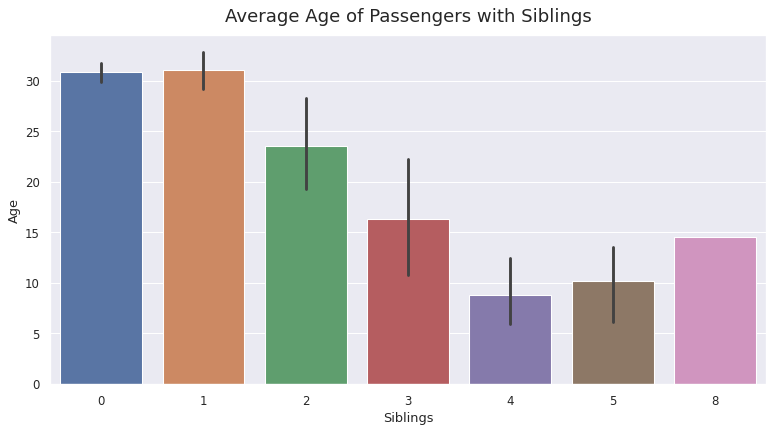

In [76]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

***
`Age` and `Parch`
***

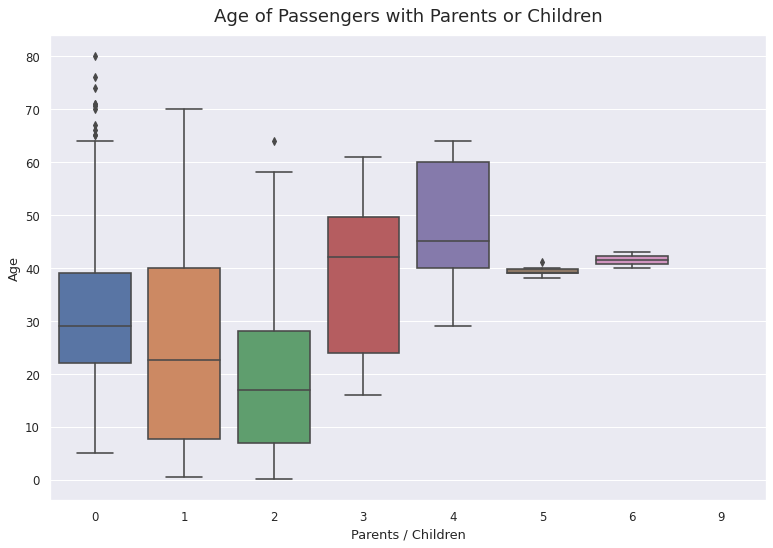

In [77]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

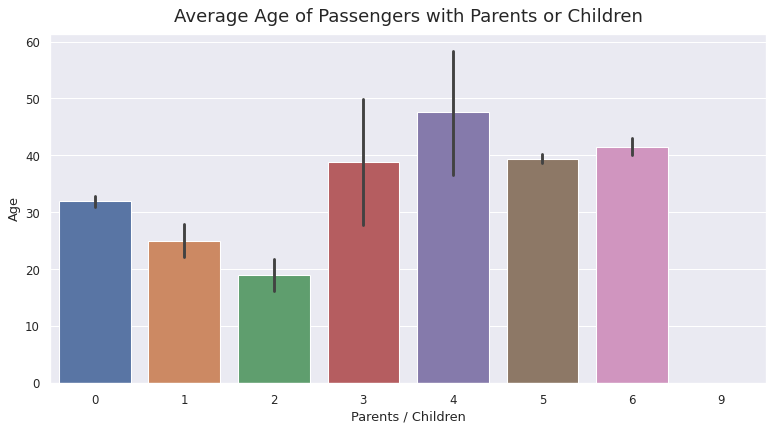

In [78]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

***
`Age` and `Pclass`
***

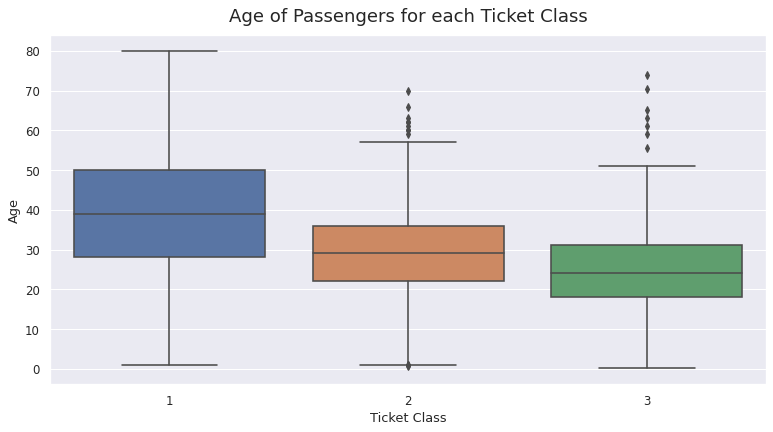

In [79]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

### Comparing multiple columns

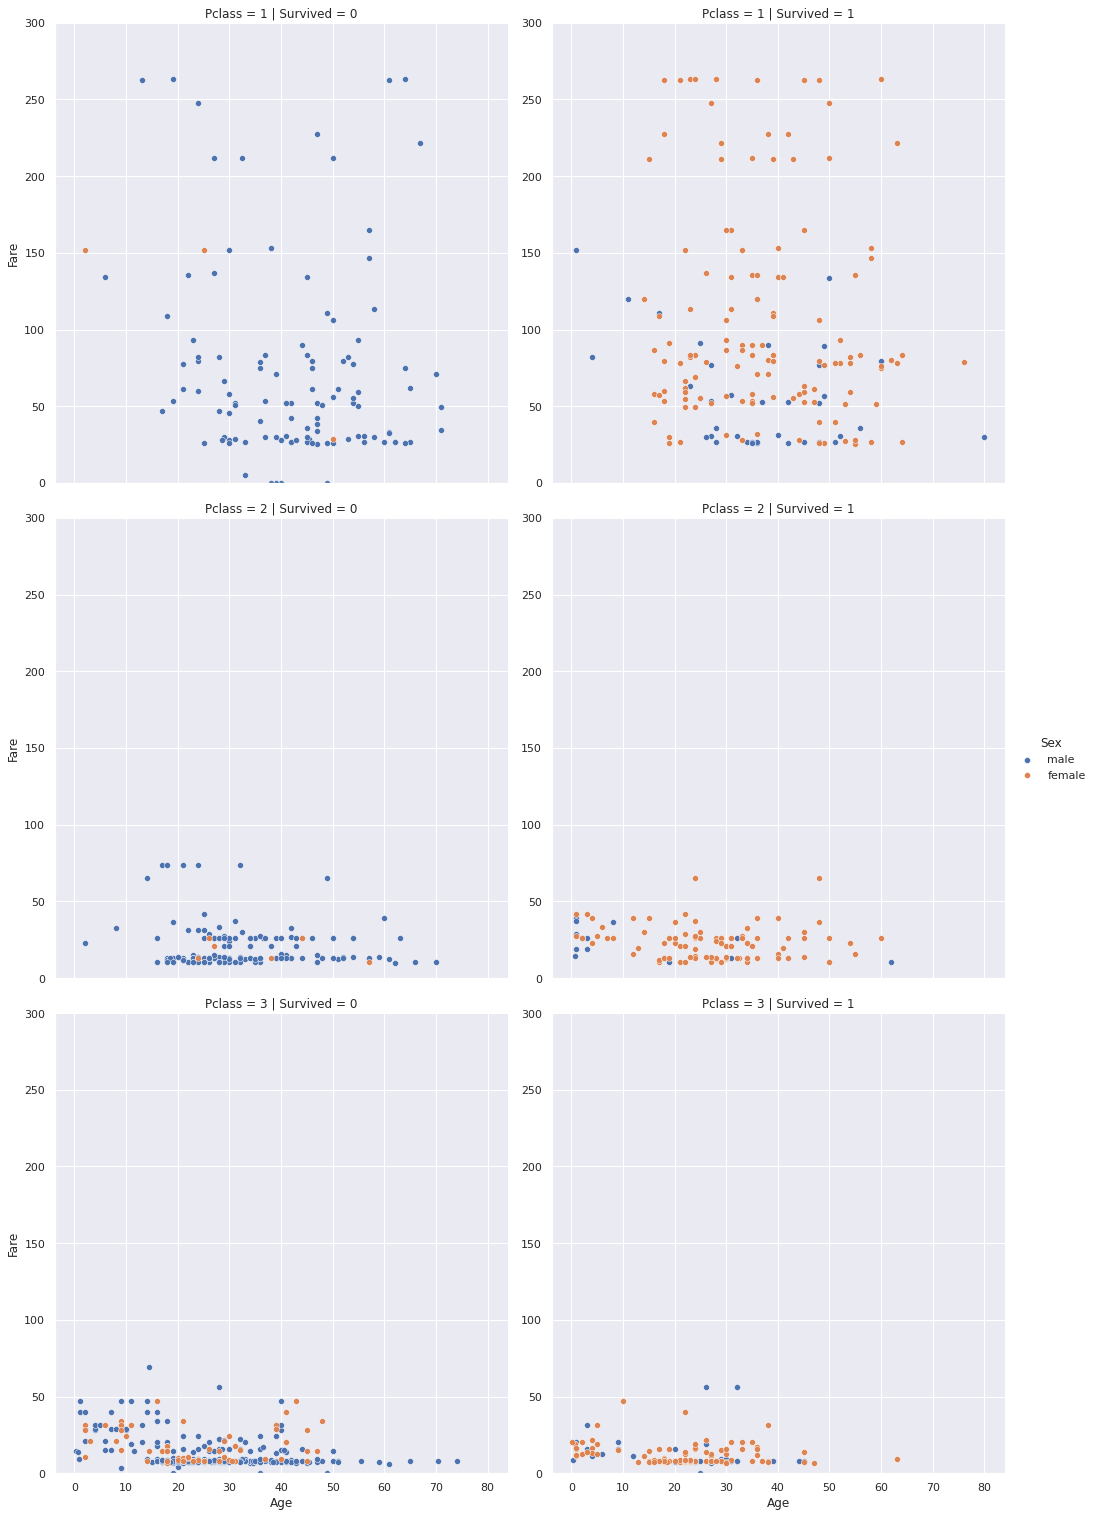

In [80]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

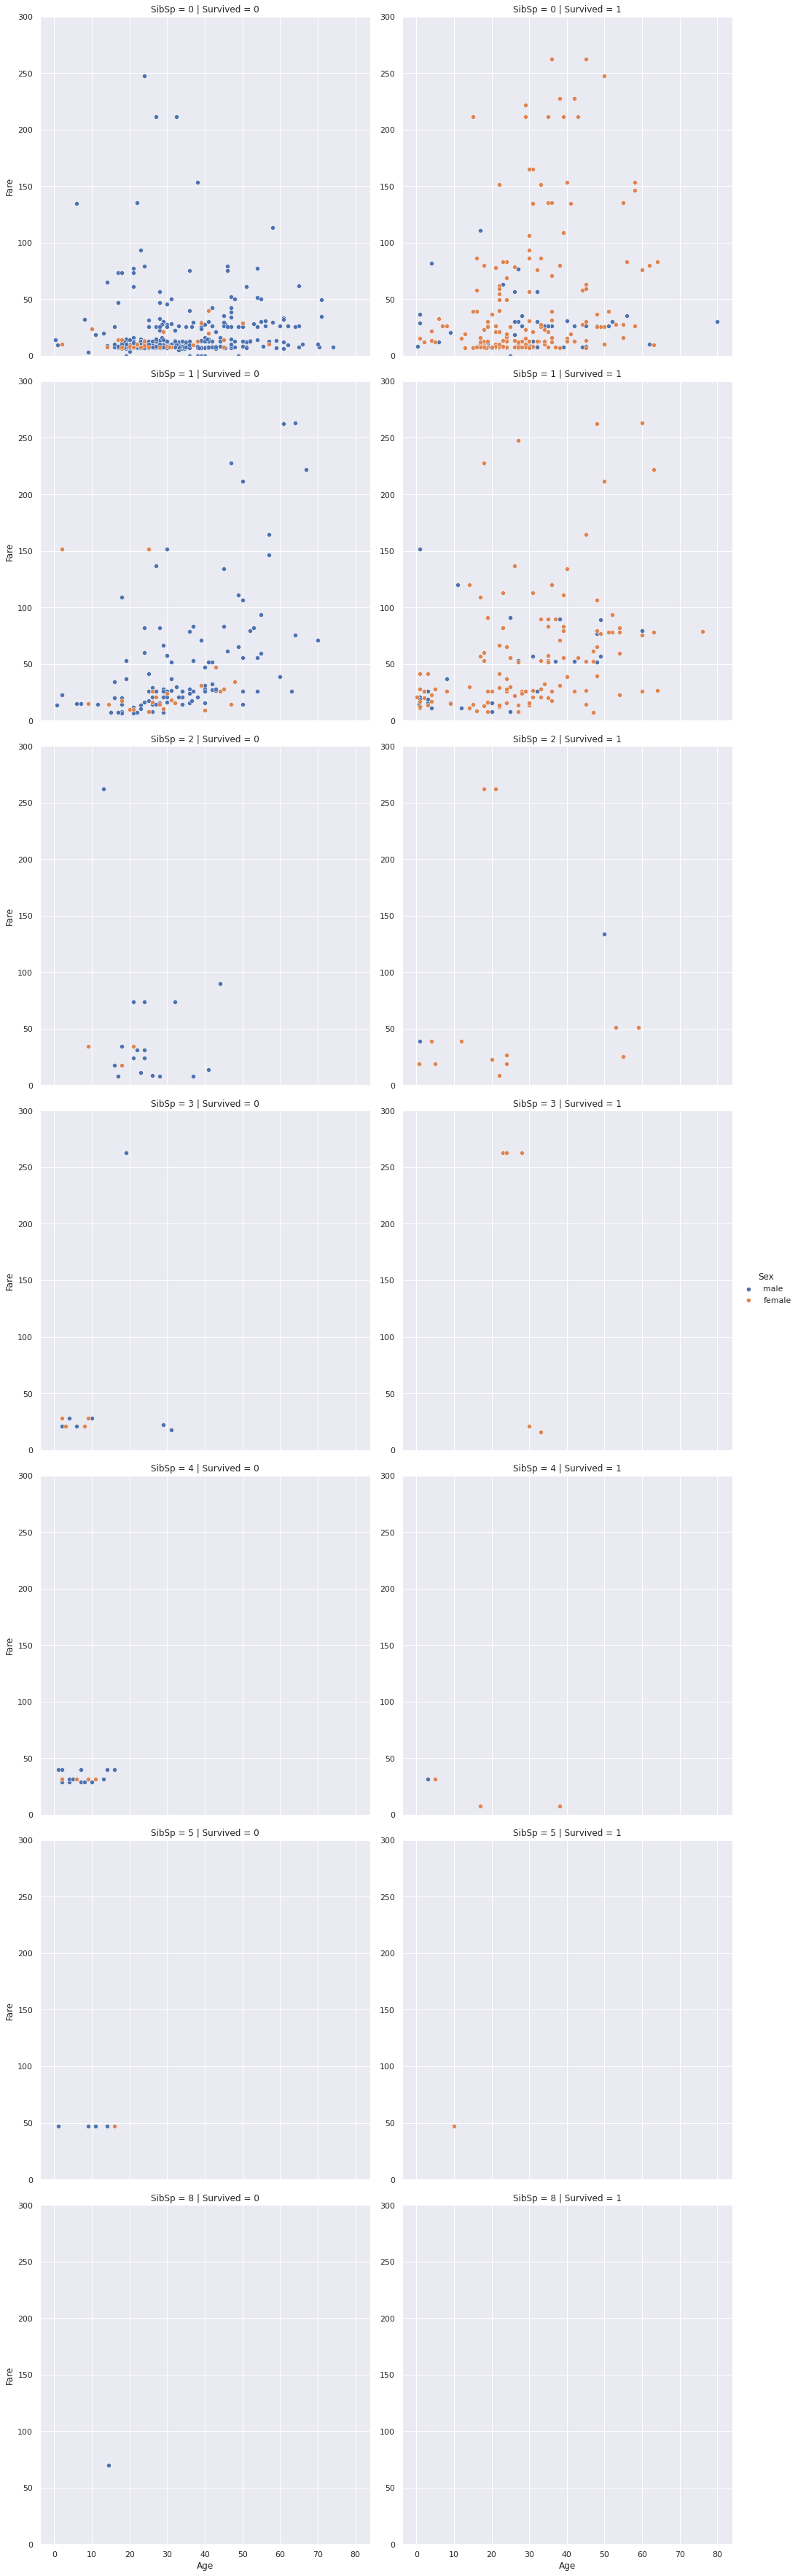

In [81]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

***
`Fare`
***

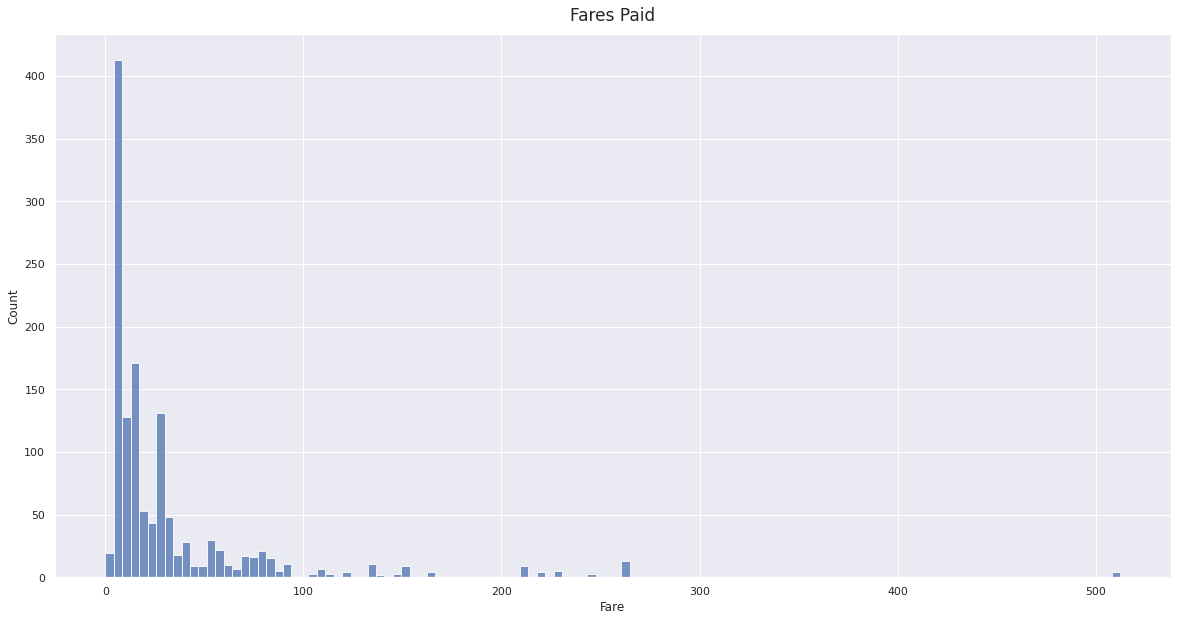

In [82]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

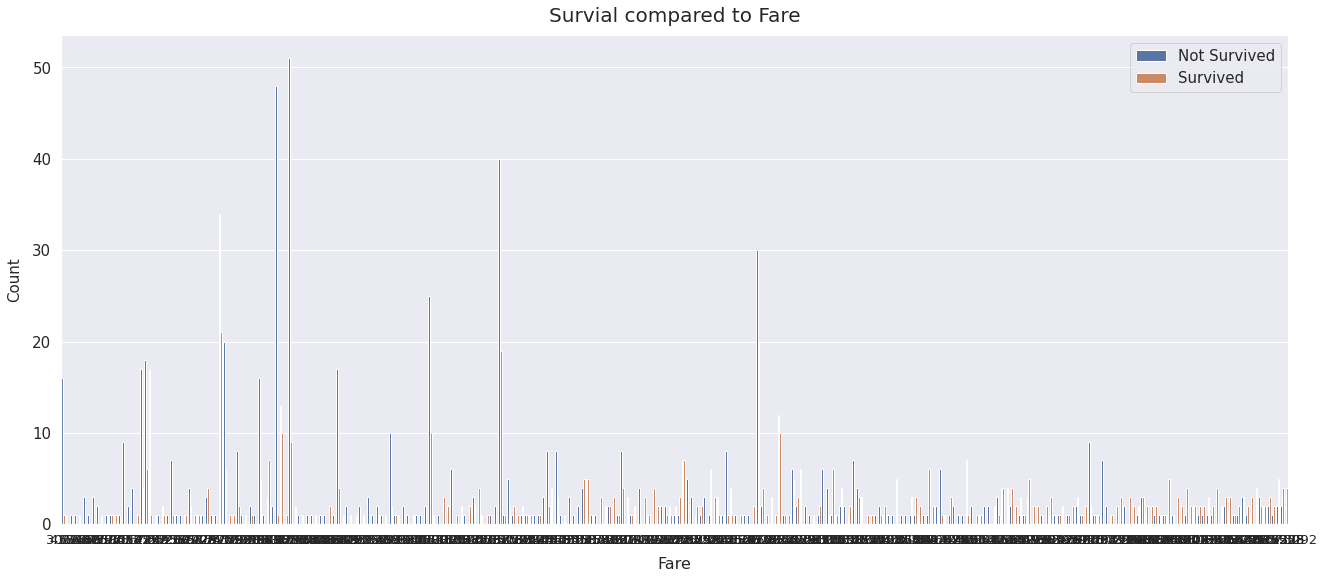

In [83]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()
